### Imports

In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
sns.set(rc={'figure.figsize':(14, 6)})

import warnings
warnings.filterwarnings('ignore')

### Data

In [9]:
train = pd.read_csv('../../data/house_prices/train.csv')
test  = pd.read_csv('../../data/house_prices/test.csv')

full = pd.concat([train, test])
train_N = len(train)

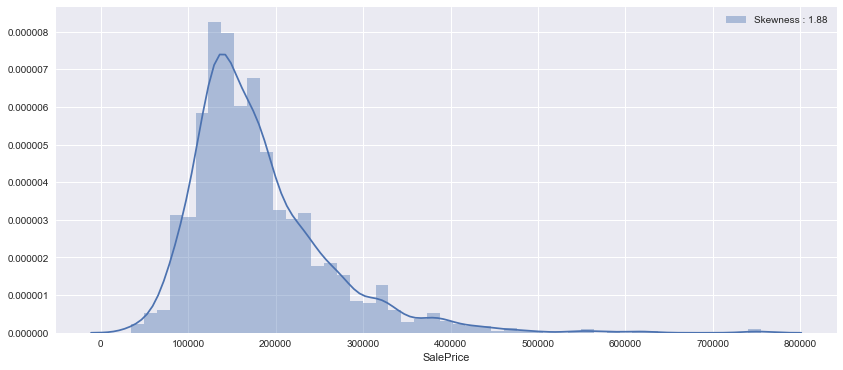

In [10]:
#histogram

g = sns.distplot(train["SalePrice"], label="Skewness : %.2f"%(train["SalePrice"].skew()))
_ = g.legend(loc="best")

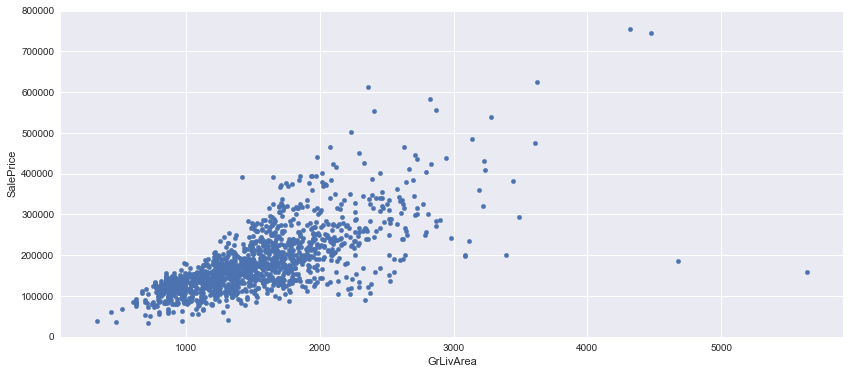

In [12]:
train.plot(kind="scatter", x="GrLivArea", y='SalePrice', ylim=(0,800000));

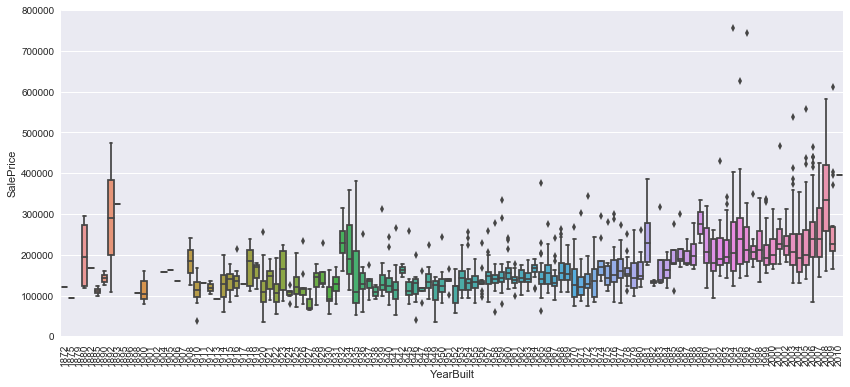

In [13]:
g = sns.boxplot(x="YearBuilt", y="SalePrice", data=full)
g.axis(ymin=0, ymax=800000)
_ = plt.xticks(rotation=90)

### correlation matrix

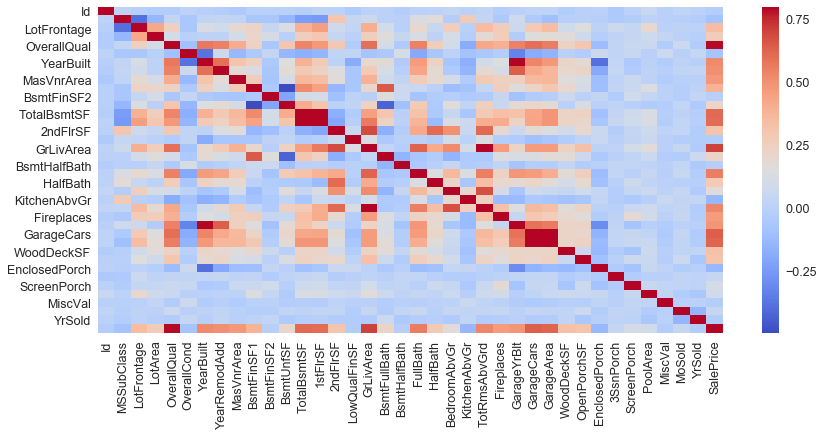

In [19]:
_ = sns.heatmap(train.corr(), vmax=.8, cmap="coolwarm")

### saleprice correlation matrix

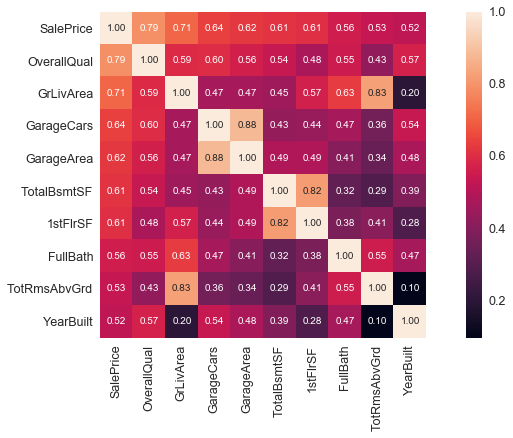

In [18]:
cols = train.corr().nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
_ = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

### Pairplots

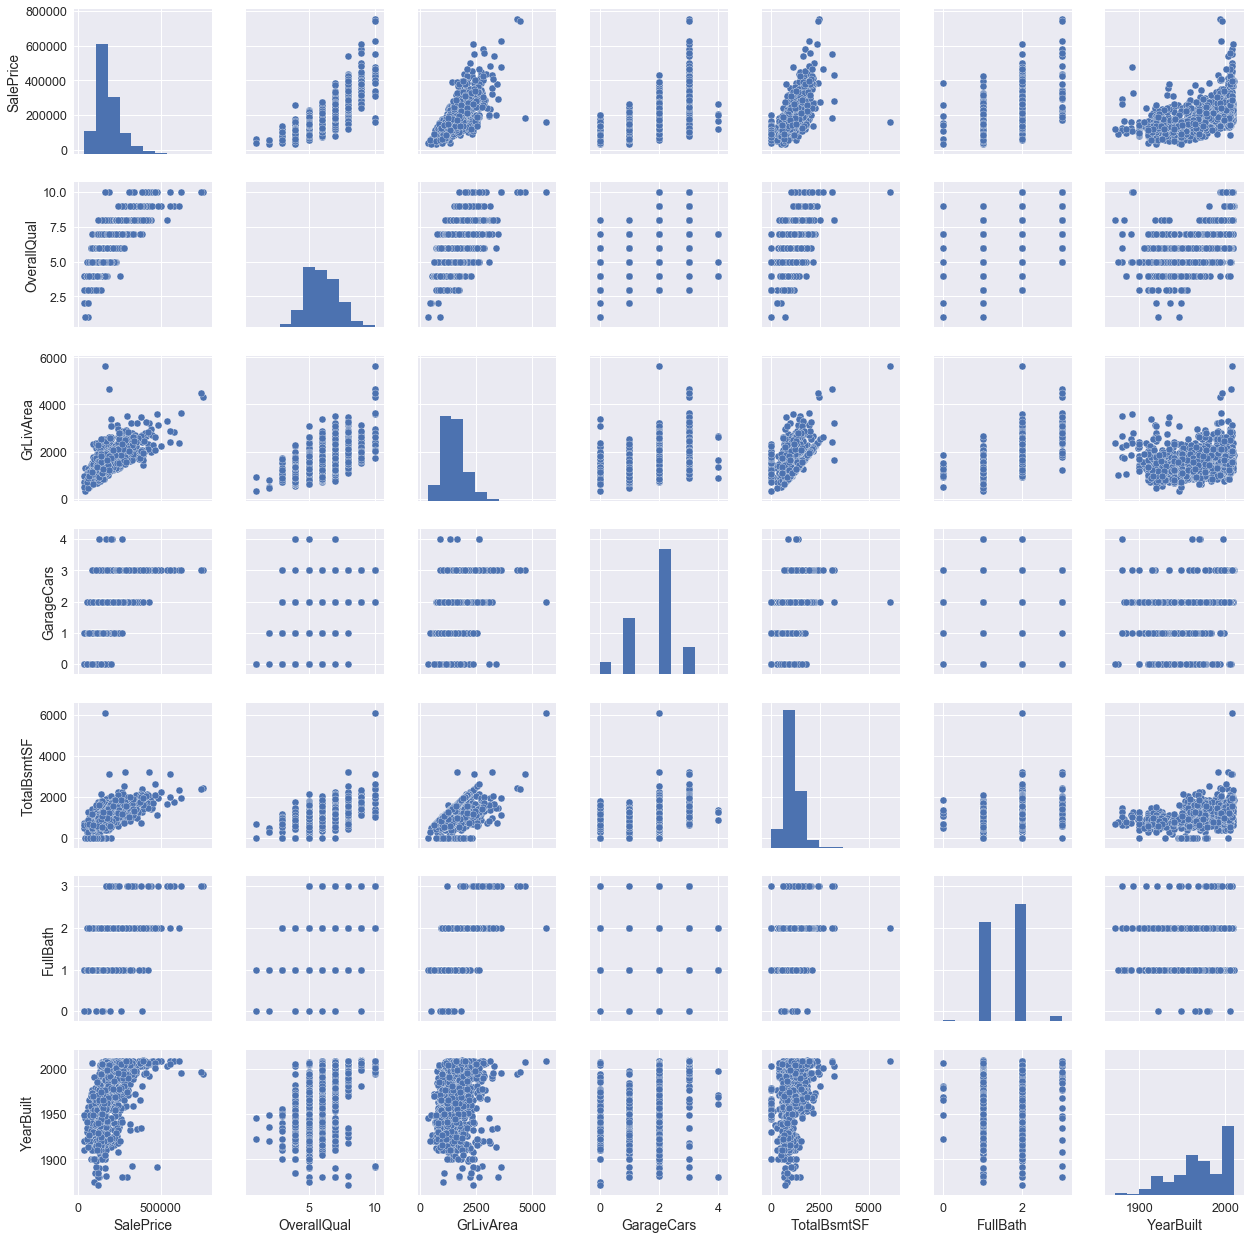

In [21]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
_ = sns.pairplot(train[cols], size = 2.5)


 mu = 180921.20 and sigma = 79415.29



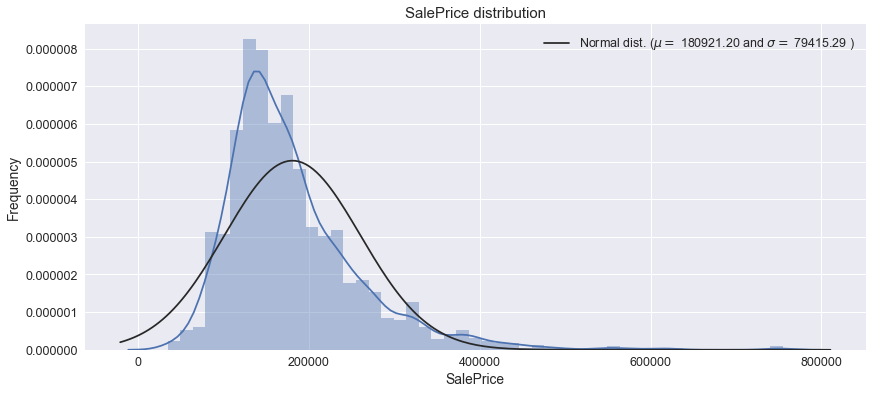

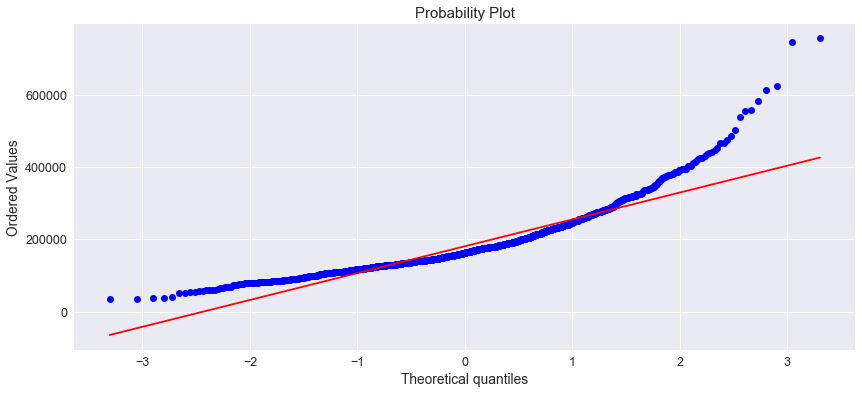

In [26]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
_ = stats.probplot(train['SalePrice'], plot=plt)